 # Lab 2
  
 ### By Alejandra, Roja , and Franklin
 
 MATH0154 Computational Statistics with Prof. 😂Gabe Chandler😂


👏 🙌 🍻

In [1]:
f <- function(x) {
    #an example function for maximization
  return(-x^{2} + 10*sin(x))
}

In [2]:
Gen0 <- function(n, locale) {
  return(runif(n, locale[1],locale[2]))
} 

In [263]:
BreedProb <- function(orgs, f) {
  p <- exp(f(orgs))/sum(exp(f(orgs))) #probability of breeding array, length n organisms
  df <- data.frame(orgs,p)
  output <- df[order(df$p),] # orders by probability, ascending 
  return(output) # we want to return organisms ordered by probability of reproduction
}

Breed <- function(bp, n, k) { # functionally this has stayed the same
  # select parents using multinom
    parents <- list()
    babies <- list()
    
    for (i in (1:n)){
        parents[[i]] <- sort(sample(bp$orgs, size = 2, replace = FALSE,  prob = bp$p))
    }
    
    for (j in (1:length(parents))) {
        babies[[j]] <- runif(k, parents[[j]][1],parents[[j]][2])
    }
    
    return(unlist(babies))
    }

Mutate <- function(new_gen, eps, pct) {
    
    n <- as.integer((pct/100.0)*length(new_gen))
    
    mutated_indices <- sample((1:length(new_gen)), n)
    mutated <- new_gen[mutated_indices] + runif(n, -eps, eps)
    new_gen[mutated_indices] <- mutated
    
    return(new_gen)
    
    }

Select <- function(bp, cutoff) {
    return(tail(bp, cutoff)$orgs)
}

In [264]:
generations <- list(Gen0(10, c(-10,10)))

std <- 10
tol <- 0.001
i <- 2

In [265]:
generations

[[1]]
 [1] -8.0718108  6.3780217  9.7027838  5.8689963  0.5481617 -6.4935268
 [7] -1.4615144  5.3133010  4.7966490 -3.8106558

In [266]:
while (std > tol) {
    bp <- BreedProb(generations[[i-1]], f)
    new_gen <- Breed(bp,10,10)
    mutated <- Mutate(new_gen, std, 10)
    
    new_bp <- BreedProb(mutated, f)
    generations[[i]] <- Select(new_bp,10)
    std <- sd(generations[[i]])
    i <- i+1
}

In [267]:
generations

[[1]]
 [1] -8.0718108  6.3780217  9.7027838  5.8689963  0.5481617 -6.4935268
 [7] -1.4615144  5.3133010  4.7966490 -3.8106558

[[2]]
 [1] 0.1350792 0.1395170 0.1500426 0.1518170 0.2768148 0.2869535 2.2404919
 [8] 0.4148042 0.4424541 0.4562556

[[3]]
 [1] 1.013382 1.056305 1.074090 1.516731 1.095732 1.163142 1.446425 1.411271
 [9] 1.212272 1.284187

[[4]]
 [1] 1.294094 1.296136 1.316722 1.316547 1.299260 1.300357 1.300635 1.301807
 [9] 1.302105 1.309753

[[5]]
 [1] 1.307416 1.307330 1.305610 1.307254 1.307196 1.305700 1.305813 1.307025
 [9] 1.306964 1.306682

In [268]:
final_xy <- data.frame(gen_vector, f(gen_vector))

In [269]:
final_xy

,gen_vector,f.gen_vector.
1,-0.1125561,-1.1358550
2,-0.4368612,-4.4218228
3,1.473738,7.781032
4,-3.527680,-8.678859
5,-2.620395,-11.845661
6,3.868909,-21.617136
7,-9.316968,-87.881902
8,-9.705146,-91.422763
9,-2.734488,-11.436949
10,2.860908,-5.414655


In [270]:
final_xy$f.gen_vector.

[1]  -1.135855  -4.421823   7.781032  -8.678859 -11.845661 -21.617136
 [7] -87.881902 -91.422763 -11.436949  -5.414655   7.922426   7.924944
[13]   7.930986   7.938173   7.940230   7.943747   7.944606   7.945276
[19]   7.945684   7.945717   7.945696   7.945703   7.945704   7.945706
[25]   7.945709   7.945711   7.945717   7.945818   7.945820   7.945823

In [271]:
sol <- tail(final_xy[order(final_xy$f.gen_vector),],1)$gen_vector

In [272]:
sol

[1] 1.306311

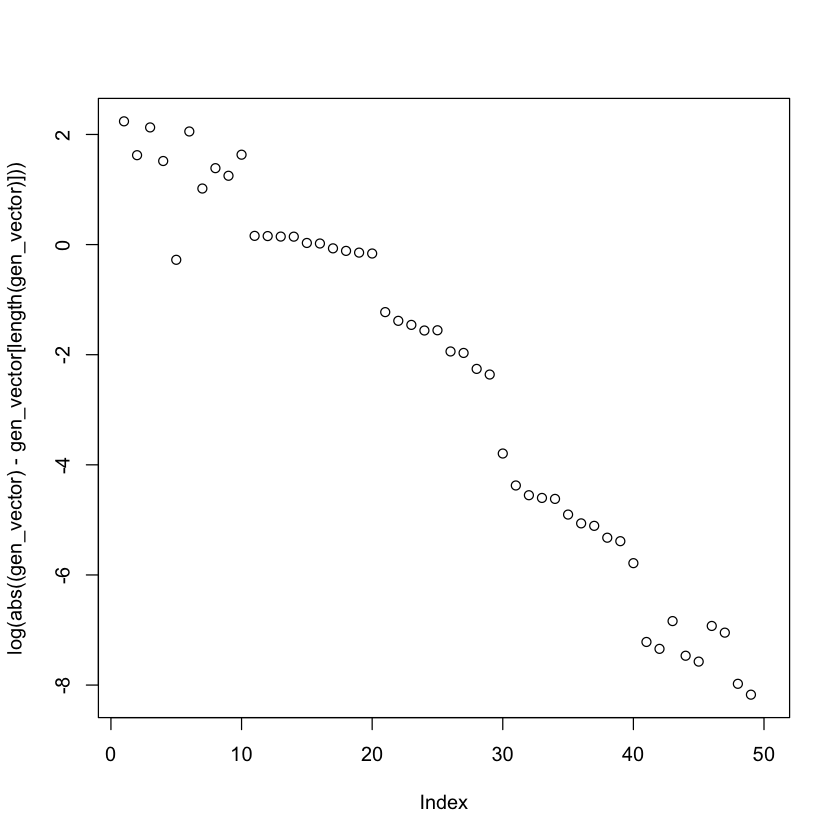

In [273]:
gen_vector <- unlist(generations)

plot(log(abs((gen_vector) - gen_vector[length(gen_vector)])))

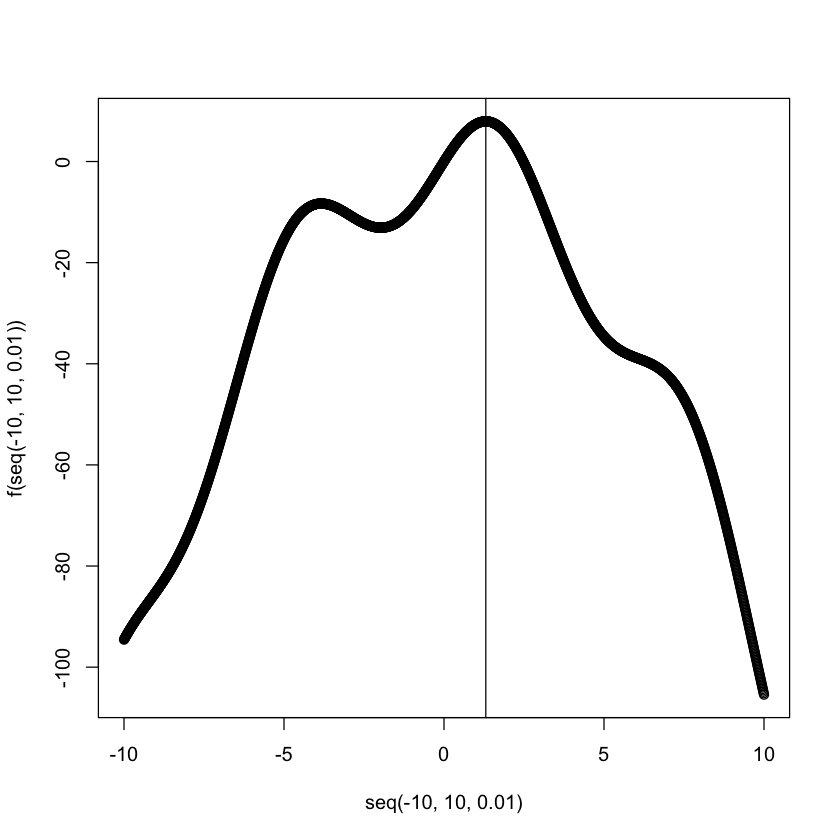

In [275]:
plot(seq(-10,10, 0.01),f(seq(-10,10, 0.01)))
abline(v = sol)